In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dpi = 120

In [4]:
data_address = '../Data/'
df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


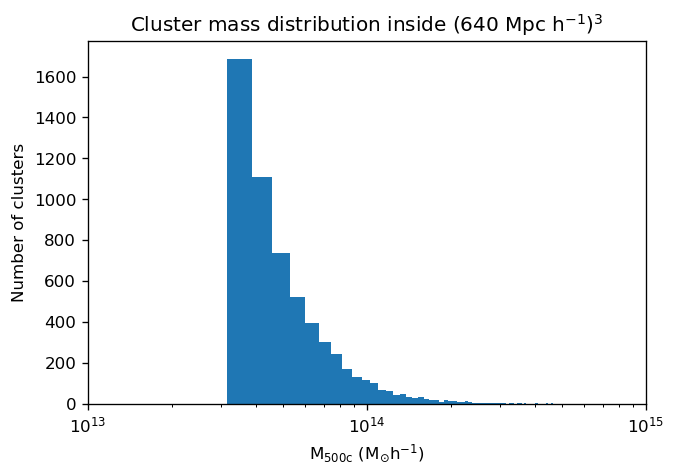

In [5]:
plt.figure(dpi = dpi)
plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

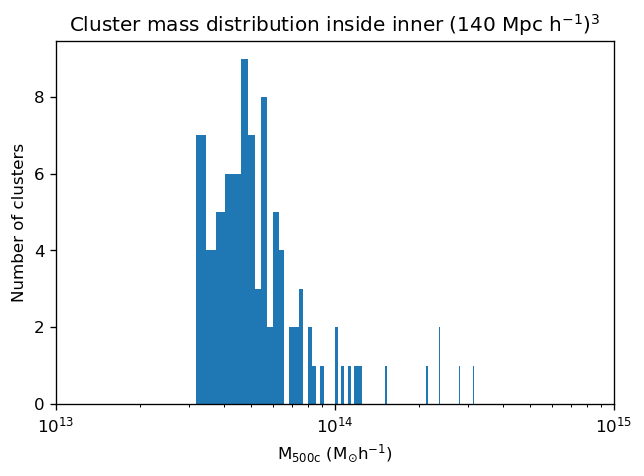

In [6]:
low_bound = 250000
upp_bound = 390000
df_clusters_inner = df_clusters_orig[(df_clusters_orig['x[kpc/h]'] > low_bound) & 
                               (df_clusters_orig['x[kpc/h]'] < upp_bound) &
                               (df_clusters_orig['y[kpc/h]'] > low_bound) & 
                               (df_clusters_orig['y[kpc/h]'] < upp_bound) & 
                               (df_clusters_orig['z[kpc/h]'] > low_bound) & 
                               (df_clusters_orig['z[kpc/h]'] < upp_bound)]
plt.figure(dpi = dpi)
plt.hist(df_clusters_inner['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside inner (140 Mpc h$^{-1}$)$^3$');

In [7]:
df_clusters_inner.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000
mean,327475.959556,327499.759889,307146.562667,6.898653e+13,115.082577,216.484800,-73.241142
std,43225.590387,43116.722874,42175.829596,5.180227e+13,299.183632,236.899501,246.527861
min,251476.330000,253901.440000,252956.950000,3.180670e+13,-997.993000,-245.123000,-734.910000
25%,291413.797500,283984.250000,267332.962500,4.325092e+13,-54.930100,55.315175,-179.257000
50%,332288.515000,336966.485000,302073.045000,5.268110e+13,154.554500,190.731000,-101.711000
75%,369537.700000,361592.177500,346525.680000,6.969482e+13,324.439250,403.463500,49.552425
max,389948.030000,389610.190000,387125.030000,3.145060e+14,789.958000,831.151000,900.098000


In [15]:
df_gal_orig = pd.read_csv(data_address + 'massive_galaxies.csv')      #massive_galaxies.csv contains galaxies with mass greater than 1.8 ×10^{11} h^{−1} M_sun as done by Tanimura et al. (2020)
df_gal_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],m_gas[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,93097.000000,93097.000000,93097.000000,9.309700e+04,9.309700e+04,93097.000000,93097.000000,93097.000000
mean,325576.133087,322500.028738,320613.762863,3.993206e+11,1.326202e+12,0.763965,0.349477,-0.509183
std,184863.273960,182799.587421,183249.915097,3.995129e+11,2.955465e+12,351.345586,343.572230,328.125457
min,1.864417,10.164207,0.260974,1.800010e+11,0.000000e+00,-2896.388700,-2323.086700,-2275.444800
25%,163866.950000,166201.380000,162514.560000,2.161480e+11,2.976010e+11,-219.363920,-215.157970,-201.740720
50%,332449.620000,329260.160000,319925.780000,2.784900e+11,5.810010e+11,-2.822351,2.646382,-3.028148
75%,483949.000000,475466.120000,478698.410000,4.192930e+11,1.244070e+12,216.770710,214.257250,200.506210
max,639996.190000,639980.940000,639993.120000,1.077460e+13,1.420090e+14,2423.330800,3048.129900,2638.449000


In [68]:
def bulk_velocity_with_mass(df_clusters_inner):
    
    if len(df_clusters_inner) == 0:
        print('No cluster in this mass range.')
        return
    
    random_cluster = df_clusters_inner.sample(random_state = 0)

    max_extent = 250000

    df_gal_cube = df_gal_orig[
                        (df_gal_orig['x[kpc/h]'] > (random_cluster['x[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_gal_orig['x[kpc/h]'] < (random_cluster['x[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_gal_orig['y[kpc/h]'] > (random_cluster['y[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_gal_orig['y[kpc/h]'] < (random_cluster['y[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_gal_orig['z[kpc/h]'] > (random_cluster['z[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_gal_orig['z[kpc/h]'] < (random_cluster['z[kpc/h]'].iloc[0] + max_extent))
                                        ]
    
    df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'].iloc[0])
    df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'].iloc[0])
    df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'].iloc[0])
    

    df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                    df_gal_cube['y_shift[kpc/h]']**2 +
                                                    df_gal_cube['z_shift[kpc/h]']**2))
    

    radi = np.arange(0, 250001, 10000)
    
    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
    
    no_cluster_rad_x = 0
    no_cluster_rad_y = 0
    no_cluster_rad_z = 0

    for i, r in enumerate(radi):

        df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]

#         if (len(df_gal_sphere) == 1):
#             no_cluster_rad_x = r
        
        v_bulk_x[i] = (np.sum(df_gal_sphere['vx[km/s]'] * df_gal_sphere['m[Msol/h]'].abs()) / 
                           np.sum(df_gal_sphere['m[Msol/h]'].abs()))

            
            
#         if (np.sum(df_gal_sphere['y_shift[kpc/h]'].abs()) == 0):
#              no_cluster_rad_y = r
        
        v_bulk_y[i] = (np.sum(df_gal_sphere['vy[km/s]'] * df_gal_sphere['m[Msol/h]'].abs()) / 
                           np.sum(df_gal_sphere['m[Msol/h]'].abs()))

            
            
#         if (np.sum(df_gal_sphere['z_shift[kpc/h]'].abs()) == 0):
#             no_cluster_rad_z = r
        
        v_bulk_z[i] = (np.sum(df_gal_sphere['vz[km/s]'] * df_gal_sphere['m[Msol/h]'].abs()) / 
                           np.sum(df_gal_sphere['m[Msol/h]'].abs()))

            
    
    v_bulk_mag = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    plt.figure(dpi = dpi)
    plt.grid(ls = 'dashed', alpha = 0.3)
    plt.plot(radi/1e3, v_bulk_x, label = 'v$\mathrm{_{bulk, x}}$', lw = 0.8)
    plt.plot(radi/1e3, v_bulk_y, label = 'v$\mathrm{_{bulk, y}}$', lw = 0.8)
    plt.plot(radi/1e3, v_bulk_z, label = 'v$\mathrm{_{bulk, z}}$', lw = 0.8)
    plt.plot(radi/1e3, v_bulk_mag, label = 'v$\mathrm{_{bulk, mag}}$')
    plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
    plt.ylabel('Bulk velocity (km/s)')
    plt.legend()
    plt.ylim(-400, 600)
    plt.xlim(radi[0]/1e3, radi[-1]/1e3)
    
    plt.hlines(y = 0, xmin = radi[0]/1e3, xmax = radi[-1]/1e3, colors = 'k',  lw = 0.5)
    
#     if (no_cluster_rad_x > 0) or (no_cluster_rad_y > 0) or (no_cluster_rad_z > 0):
#         plt.text(0.35, 0.2, f'No cluster inside inner {no_cluster_rad_x/1e3} (x), {no_cluster_rad_y/1e3} (y) & {no_cluster_rad_z/1e3} (z) Mpc/h', transform=plt.gca().transAxes, fontsize = 7)
        
    plt.text(0.35, 0.12, f'Bulk velocity magnitude inside 250 Mpc/h: {round(v_bulk_mag[-1], 1)} km/s', transform=plt.gca().transAxes, fontsize = 7)
    plt.title("Cluster M$_{500\mathrm{c}}$:" + " {:.2e} ".format(random_cluster['m500c[Msol/h]'].iloc[0]) + 'M$_{\odot}$h$^{-1}$' + "| Using masses");

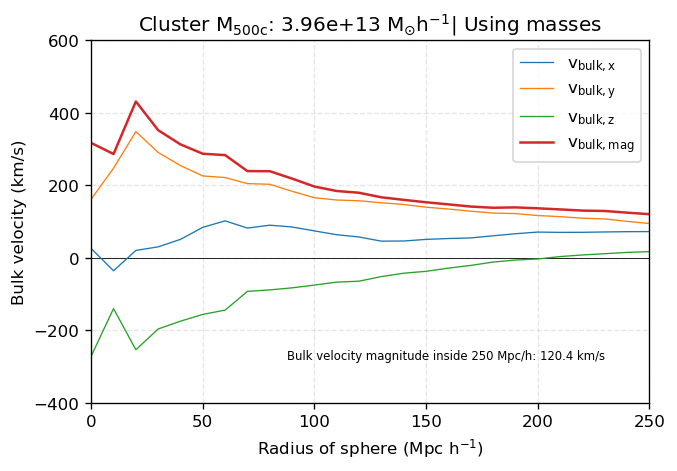

In [69]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 3e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 5e13)])


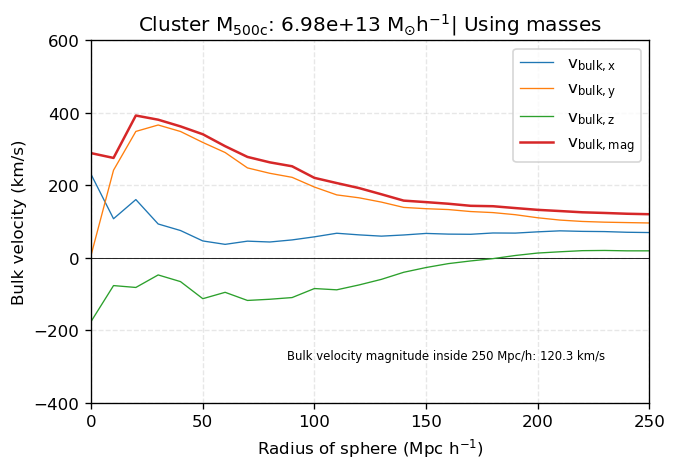

In [70]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 5e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 7e13)])

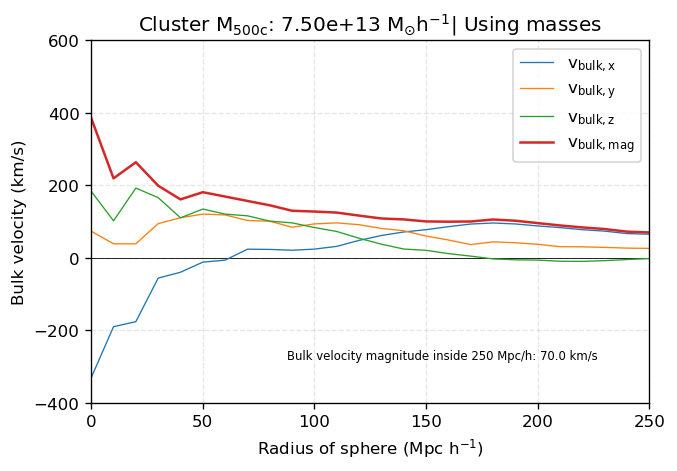

In [71]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 7e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 9e13)])

In [42]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 9e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 1e14)])

No cluster in this mass range.


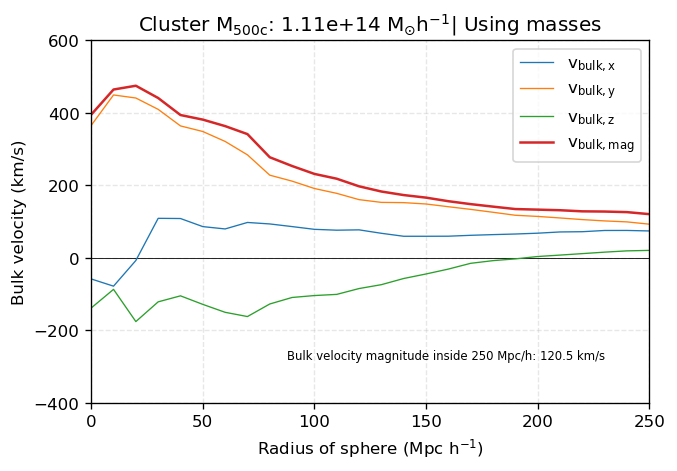

In [72]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 1e14) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 3e14)])

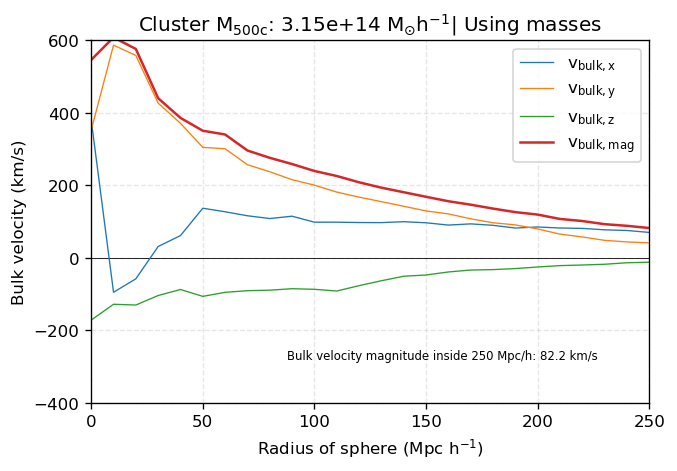

In [73]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 3e14) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 5e14)])

In [97]:
def bulk_velocity_with_mass_mag_only(df_clusters_inner):
      
    random_cluster = df_clusters_inner.sample(random_state = 0)

    max_extent = 250000

    df_gal_cube = df_gal_orig[
                        (df_gal_orig['x[kpc/h]'] > (random_cluster['x[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_gal_orig['x[kpc/h]'] < (random_cluster['x[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_gal_orig['y[kpc/h]'] > (random_cluster['y[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_gal_orig['y[kpc/h]'] < (random_cluster['y[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_gal_orig['z[kpc/h]'] > (random_cluster['z[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_gal_orig['z[kpc/h]'] < (random_cluster['z[kpc/h]'].iloc[0] + max_extent))
                                        ]
    
    df_gal_cube.insert(3, 'x_shift[kpc/h]', df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'].iloc[0])
    df_gal_cube.insert(4, 'y_shift[kpc/h]', df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'].iloc[0])
    df_gal_cube.insert(5, 'z_shift[kpc/h]', df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'].iloc[0])
    

    df_gal_cube.insert(6, 'dist_from_clus', np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                                    df_gal_cube['y_shift[kpc/h]']**2 +
                                                    df_gal_cube['z_shift[kpc/h]']**2))
    

    radi = np.arange(0, 250001, 10000)
    
    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
    
    no_cluster_rad_x = 0
    no_cluster_rad_y = 0
    no_cluster_rad_z = 0

    for i, r in enumerate(radi):

        df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]

        
        v_bulk_x[i] = (np.sum(df_gal_sphere['vx[km/s]'] * df_gal_sphere['m[Msol/h]'].abs()) / 
                           np.sum(df_gal_sphere['m[Msol/h]'].abs()))

                   
        v_bulk_y[i] = (np.sum(df_gal_sphere['vy[km/s]'] * df_gal_sphere['m[Msol/h]'].abs()) / 
                           np.sum(df_gal_sphere['m[Msol/h]'].abs()))

        
        v_bulk_z[i] = (np.sum(df_gal_sphere['vz[km/s]'] * df_gal_sphere['m[Msol/h]'].abs()) / 
                           np.sum(df_gal_sphere['m[Msol/h]'].abs()))

            
    
    v_bulk_mag = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    
    plt.plot(radi/1e3, v_bulk_mag, 
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(random_cluster['m500c[Msol/h]'].iloc[0]) + 'M$_{\odot}$h$^{-1}$')   
    

No cluster in the mass range between 9.00e+13 and 1.00e+14.
No cluster in the mass range between 5.00e+14 and 7.00e+14.


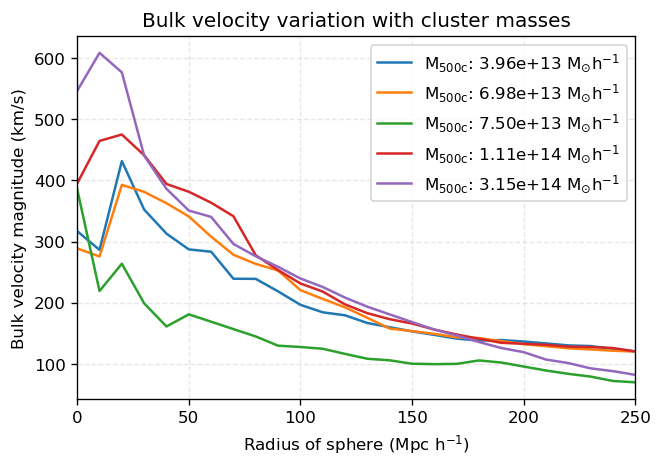

In [100]:
plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]

for i, mass in enumerate(mass_ranges[:-1]):
    
    if len(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > mass_ranges[i]) & 
                             (df_clusters_inner['m500c[Msol/h]'] < mass_ranges[i+1])])  == 0 :
        
        print(f'No cluster in the mass range between {mass_ranges[i]:.2e} and {mass_ranges[i+1]:.2e}.')
        continue
    
    bulk_velocity_with_mass_mag_only(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > mass_ranges[i]) & 
                                                       (df_clusters_inner['m500c[Msol/h]'] < mass_ranges[i+1])])
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Bulk velocity magnitude (km/s)')
plt.legend()
# plt.ylim(0, 900)
plt.xlim(0, 250)


plt.title('Bulk velocity variation with cluster masses');